# Neural Networks 101

### Agenda
1. What is a Neural Network (NN)? Who is CHRS? What is CHRS?
2. ⚙️ Math!!
3. Building a NN with Numpy #Numpy4Life 🫶🏼
4. 💁🏽‍♂️ How do cool kids do NN: pytorch

## What is a neural network?

Neural Networks are universal function approximators. Theoritically, a neural network, with infinite depth and breath, can approximate any function. Given a $D = \{(x_i,y_i) | i=1,2,\dots,n\}$, a neural network approximates the function $f$ that $f(x) \rightarrow y$.

<p align="center">
  <img src="nn_arch.png" width="60%" height="30%"/>
</p>

## Numpy Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
X = (np.linspace(0, 4, 128) * np.pi).reshape(-1, 1)
Y = np.sin(X).reshape(-1, 1)

In [38]:
w1 = np.random.rand(1, 5)
w2 = np.random.rand(5, 1)
network_weights = [w1, w2]
relu = lambda x: np.maximum(0.0, x)

In [39]:
alpha = 0.0001
loss_tracker = []
interation_indicator = []

In [40]:
for iteration in range(0, 5):
    # Forward pass
    z_1 = np.dot(X, w1)
    h_1 = relu(z_1)
    y_hat = np.dot(h_1, w2)

    # L2 loss
    L = np.dot((y_hat-Y).T, (y_hat-Y))
    loss_tracker.append(L.flatten())
    interation_indicator.append(iteration)
    print(f"Itearation {iteration} for loss: {L}")

    # Backward pass
    dl_dy = 2 * (y_hat-Y)
    dy_dw2 = h_1
    dl_dw2 = np.dot(h_1.T, dl_dy)
    dl_dh1 = np.dot(dl_dy, w2.T)
    dh1_dz1 = dl_dh1.copy()
    dh1_dz1[h_1 < 0.0] = 0.0
    dl_dw1 = np.dot(X.T, dh1_dz1)

    # Learning Step
    w1 = w1 - alpha * dl_dw1
    w2 = w2 - alpha * dl_dw2

Itearation 0 for loss: [[12932.20598154]]
Itearation 1 for loss: [[327.50103279]]
Itearation 2 for loss: [[63.5]]
Itearation 3 for loss: [[63.5]]
Itearation 4 for loss: [[62.30452382]]


Text(0, 0.5, 'Loss')

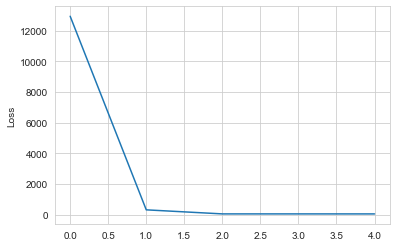

In [41]:
plt.plot(loss_tracker)
plt.ylabel("Loss")

## pytorch Neural Network

In [4]:
import torch

In [48]:
class singlelayerperceptron(torch.nn.Module):
    
    def __init__(self):
        super(singlelayerperceptron, self).__init__()
        self.layer1 = torch.nn.Linear(in_features=1,
                                      out_features=5)
        self.activation1 = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(in_features=5,
                                      out_features=1)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.activation1(x)
        x = self.layer2(x)
        return x

In [49]:
loss_logger = []
neural_nets = singlelayerperceptron()
loss = torch.nn.MSELoss(reduction="sum")
optimizer = torch.optim.SGD(neural_nets.parameters(), lr=0.001)

In [50]:
for iteration in range(0, 5):
    x_train = torch.rand(128, 1)
    y_train = torch.rand(128, 1)
    
    optimizer.zero_grad()
    
    y_predicted = neural_nets(x_train)
    loss_value = loss(y_predicted, y_train)
    
    loss_value.backward()
    
    optimizer.step()
    
    loss_logger.append(loss_value.detach().numpy())

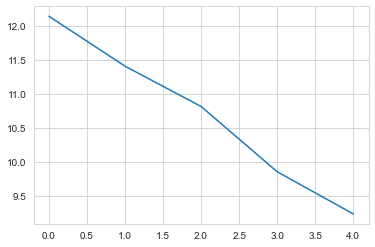

In [51]:
plt.plot(loss_logger)